In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

In [2]:
# Model-specific imports:
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [3]:
# IMPORTING ALL DATA:
inputData = pd.read_excel('../Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1)

# IMPORTING ONLY TOP FEATURES:
topFeaturesData = pd.read_excel('../meryck/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

print(inputData.head())
topFeaturesData.head()

      S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
42      43                 21450.5              707.2   
1242  1243                  9551.5              206.1   
422    423                 19278.3             1105.5   
2428  2429                  5094.7              462.8   
1161  1162                 19955.6              427.6   

      Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
42                         13946.3                 48262.1         6100.5   
1242                       14506.0                 52185.3         7307.4   
422                        13772.2                 50315.1         6243.2   
2428                       13255.1                 53792.3         7831.7   
1161                       11919.7                 37009.3         5339.1   

      Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
42          3793.8        3930.4         1864.6         3152.0  ...   
1242        3411.1        4406.2         2175.6     

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
4026,4027,6638.7,984.1,3886.1,1298.4,468.9,7153.5,4470.0,503.1,202455.8713,...,2.402,2.431,2.110,2.139,2.488,2.219,2.533,2.561,2.42232,59
1512,1513,7299.5,3619.4,3999.0,1653.8,942.1,6851.7,4023.2,359.9,262221.2917,...,2.361,2.633,2.378,2.089,2.453,2.331,2.578,2.451,2.42177,78
3951,3952,7564.7,1499.7,4361.2,1590.1,532.6,7669.7,4808.6,581.8,222323.2499,...,2.466,2.521,2.173,1.998,2.415,2.248,2.678,2.392,2.38770,60
2601,2602,8511.4,1616.6,4446.5,1890.6,575.6,8593.4,5494.2,430.9,235188.3799,...,2.343,2.522,2.376,1.932,2.562,2.376,2.811,2.440,2.42784,65
3303,3304,7797.8,993.8,4107.4,1473.2,438.4,7091.8,4663.3,413.2,223010.8233,...,2.492,2.699,2.538,2.205,2.696,2.462,2.938,2.664,2.51497,48


In [18]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [6]:
# BUILDING INPUT AND OUTPUT VARIABLES USING THE TOP FEATURES:
# select the input brain volume vector (X) and the output age vector (y)
X_fs = topFeaturesData.drop(columns=['S.No', 'Age'])
y_fs = topFeaturesData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=3)

In [7]:
# instantiate a decision tree model using sklearn:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=6, min_samples_leaf=4, min_samples_split=2)


# fit the model to the training data
dt_model.fit(X_train, y_train)

/Users/agamaulakh/opt/anaconda3/envs/DeppL/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=4)

In [8]:
# check the model's performance on unseen, test data
dt_predictions = dt_model.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, dt_predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, dt_predictions))
print('mean square error:', metrics.mean_squared_error(y_test, dt_predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)))

r square value: 0.7413318355236174
mean absolute error (years): 7.28823584210617
mean square error: 97.38008737442216
root mean sqaure error (years): 9.868134949139181


In [186]:
param_dict={"criterion" : ['friedman_mse', 'mse', 'mae'],
            "max_depth" : range(1,10),
            "min_samples_split" : range(2,10), 
            "min_samples_leaf" : range(2,5)
           }
grid = GridSearchCV(dt_model, param_grid=param_dict, verbose=1, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\aulak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.7s finished


{'criterion': 'mse'}


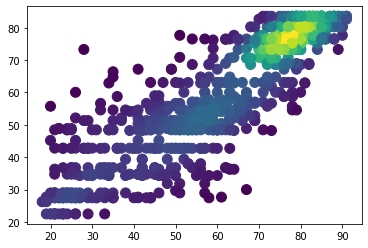

In [9]:
# Creating the point density
xy = np.vstack([y_test,dt_predictions])
z = gaussian_kde(xy)(xy)

# plotting
fig,ax = plt.subplots()
ax.scatter(y_test, dt_predictions, c=z, s=100)
plt.show()

In [10]:
# Running model again using top features

# fit the model to the training data
dt_model.fit(X_train_fs, y_train_fs)

# check the model's performance on unseen, test data
dt_predictions_fs = dt_model.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test_fs, dt_predictions_fs))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test_fs, dt_predictions_fs))
print('mean square error:', metrics.mean_squared_error(y_test_fs, dt_predictions_fs))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test_fs, dt_predictions_fs)))


r square value: 0.7441277422624054
mean absolute error (years): 7.791980784453801
mean square error: 103.93818893911237
root mean sqaure error (years): 10.195008040169089


/Users/agamaulakh/opt/anaconda3/envs/DeppL/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


### ADA Boost Regressor (based on DT)

In [12]:
# instantiate a voting regressor model using sklearn:
abr_model = AdaBoostRegressor(loss='linear', learning_rate= 1, n_estimators= 200)


# fit the model to the training data
abr_model.fit(X_train, y_train)


# check the model's performance on unseen, test data
abr_predictions = abr_model.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, abr_predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, abr_predictions))
print('mean square error:', metrics.mean_squared_error(y_test, abr_predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, abr_predictions)))

r square value: 0.8087842363726695
mean absolute error (years): 6.974319084287982
mean square error: 71.98646886867452
root mean sqaure error (years): 8.484484007214258


In [203]:
# Using a gridsearch to find te best hyperparameters
param_dict={"loss" : ['linear', 'square', 'exponential'],
            "n_estimators" : [10, 50, 100],
            "learning_rate" : [0.5, 1, 5]
           }
grid = GridSearchCV(vr_model, param_grid=param_dict, verbose=1, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\aulak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.0min finished


{'learning_rate': 1, 'n_estimators': 100}


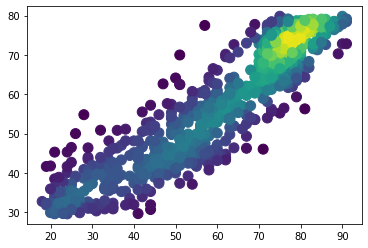

In [13]:
# Creating the point density
xy = np.vstack([y_test,abr_predictions])
z = gaussian_kde(xy)(xy)

# plotting
fig,ax = plt.subplots()
ax.scatter(y_test, abr_predictions, c=z, s=100)
plt.show()

In [14]:
# Running model again using top features

# fit the model to the training data
abr_model.fit(X_train_fs, y_train_fs)

# check the model's performance on unseen, test data
abr_predictions_fs = abr_model.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test_fs, abr_predictions_fs))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test_fs, abr_predictions_fs))
print('mean square error:', metrics.mean_squared_error(y_test_fs, abr_predictions_fs))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test_fs, abr_predictions_fs)))

r square value: 0.7684641103409795
mean absolute error (years): 7.858254610374111
mean square error: 94.05248250963037
root mean sqaure error (years): 9.698065915925214


### Neural Network

In [15]:
import tensorflow as tf
import csv
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

In [22]:
# setting inputs
dataSet = inputData

# need to conver to a numpy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


# using 250 epochs to train neural network
maxEpoch = 250
verbNum = 1

# building an ANN with 5 hidden layers with ReLu activation function
base_ann = tf.keras.models.Sequential([
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=20, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='linear')
        ])

# not using: convolution layers, drop outs, max pooling

# adding an adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compiling neural network
base_ann.compile(loss="mae", optimizer=optimizer)

# fitting neural network to input data
base_ann.fit(X_train, y_train, epochs=maxEpoch, batch_size=64, verbose=verbNum)

# predicting based on unseen data
ann_predictions = base_ann.predict(X_test)

# printing metrics
print("rscore: ", metrics.r2_score(y_test, ann_predictions))
print("MAE: ", metrics.mean_absolute_error(y_test, ann_predictions))
print("MSE: ", np.sqrt(metrics.mean_squared_error(y_test, ann_predictions)))

Train on 3380 samples
Epoch 1/250
3380/3380 [==============================] - 7s 2ms/sample - loss: 8891.9960
Epoch 2/250
3380/3380 [==============================] - 1s 219us/sample - loss: 4849.3702
Epoch 3/250
3380/3380 [==============================] - 1s 235us/sample - loss: 2165.5422
Epoch 4/250
3380/3380 [==============================] - 1s 221us/sample - loss: 1762.4342
Epoch 5/250
3380/3380 [==============================] - 1s 286us/sample - loss: 890.7519
Epoch 6/250
3380/3380 [==============================] - 1s 243us/sample - loss: 1430.9022
Epoch 7/250
3380/3380 [==============================] - 1s 221us/sample - loss: 1029.3705
Epoch 8/250
3380/3380 [==============================] - 1s 240us/sample - loss: 737.1646
Epoch 9/250
3380/3380 [==============================] - 1s 221us/sample - loss: 660.7057
Epoch 10/250
3380/3380 [==============================] - 2s 542us/sample - loss: 479.3271
Epoch 11/250
3380/3380 [==============================] - 1s 263us/sample

3380/3380 [==============================] - 1s 201us/sample - loss: 19.9211
Epoch 92/250
3380/3380 [==============================] - 1s 199us/sample - loss: 15.8437
Epoch 93/250
3380/3380 [==============================] - 1s 213us/sample - loss: 16.2785
Epoch 94/250
3380/3380 [==============================] - 1s 215us/sample - loss: 15.5877
Epoch 95/250
3380/3380 [==============================] - 1s 303us/sample - loss: 16.1053
Epoch 96/250
3380/3380 [==============================] - 1s 287us/sample - loss: 18.6604
Epoch 97/250
3380/3380 [==============================] - 1s 211us/sample - loss: 500.5889
Epoch 98/250
3380/3380 [==============================] - 1s 193us/sample - loss: 269.0578
Epoch 99/250
3380/3380 [==============================] - 1s 189us/sample - loss: 70.0247
Epoch 100/250
3380/3380 [==============================] - 1s 195us/sample - loss: 15.7761
Epoch 101/250
3380/3380 [==============================] - 1s 196us/sample - loss: 14.8236
Epoch 102/250
3380/

3380/3380 [==============================] - 1s 232us/sample - loss: 11.2971
Epoch 182/250
3380/3380 [==============================] - 1s 222us/sample - loss: 11.2780
Epoch 183/250
3380/3380 [==============================] - 1s 223us/sample - loss: 12.4685
Epoch 184/250
3380/3380 [==============================] - 1s 190us/sample - loss: 12.6670
Epoch 185/250
3380/3380 [==============================] - 1s 206us/sample - loss: 12.0214
Epoch 186/250
3380/3380 [==============================] - 1s 246us/sample - loss: 11.6687
Epoch 187/250
3380/3380 [==============================] - 1s 281us/sample - loss: 12.3716
Epoch 188/250
3380/3380 [==============================] - 1s 183us/sample - loss: 12.1631
Epoch 189/250
3380/3380 [==============================] - 2s 468us/sample - loss: 12.5589
Epoch 190/250
3380/3380 [==============================] - 1s 201us/sample - loss: 12.0415
Epoch 191/250
3380/3380 [==============================] - 1s 194us/sample - loss: 11.5363
Epoch 192/250

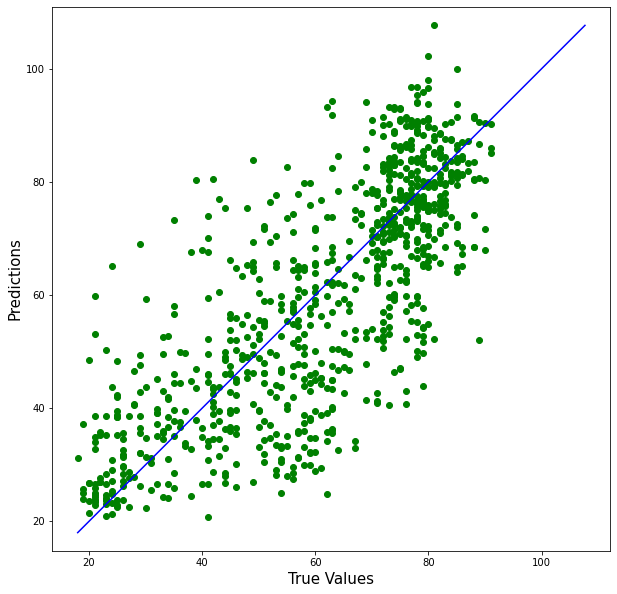

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ann_predictions, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(ann_predictions), max(y_test))
p2 = min(min(ann_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [26]:
# RUNNING SAME NEURAL NETWORK USING TOP FEATURES

# need to conver to a numpy array
X_train_fs = np.asarray(X_train_fs)
y_train_fs = np.asarray(y_train_fs)
X_test_fs = np.asarray(X_test_fs)
y_test_fs = np.asarray(y_test_fs)


# using 250 epochs to train neural network
maxEpoch = 250
verbNum = 1

# building an ANN with 5 hidden layers with ReLu activation function
base_ann_fs = tf.keras.models.Sequential([
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=20, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='linear')
        ])

# not using: convolution layers, drop outs, max pooling

# adding an adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compiling neural network
base_ann_fs.compile(loss="mae", optimizer=optimizer)

# fitting neural network to input data
base_ann_fs.fit(X_train_fs, y_train_fs, epochs=maxEpoch, batch_size=64, verbose=verbNum)

# predicting based on unseen data
ann_predictions_fs = base_ann_fs.predict(X_test_fs)

# printing metrics
print("rscore: ", metrics.r2_score(y_test_fs, ann_predictions_fs))
print("MAE: ", metrics.mean_absolute_error(y_test_fs, ann_predictions_fs))
print("MSE: ", np.sqrt(metrics.mean_squared_error(y_test_fs, ann_predictions_fs)))

Train on 3380 samples
Epoch 1/250
3380/3380 [==============================] - 4s 1ms/sample - loss: 4999.9379
Epoch 2/250
3380/3380 [==============================] - 1s 188us/sample - loss: 1668.3029
Epoch 3/250
3380/3380 [==============================] - 1s 203us/sample - loss: 339.3017
Epoch 4/250
3380/3380 [==============================] - 1s 182us/sample - loss: 359.1567
Epoch 5/250
3380/3380 [==============================] - 1s 177us/sample - loss: 370.0118
Epoch 6/250
3380/3380 [==============================] - 1s 200us/sample - loss: 344.4446
Epoch 7/250
3380/3380 [==============================] - 1s 183us/sample - loss: 179.3373
Epoch 8/250
3380/3380 [==============================] - 1s 198us/sample - loss: 224.9286
Epoch 9/250
3380/3380 [==============================] - 1s 196us/sample - loss: 429.6325
Epoch 10/250
3380/3380 [==============================] - 1s 199us/sample - loss: 151.1175
Epoch 11/250
3380/3380 [==============================] - 1s 316us/sample - l

3380/3380 [==============================] - 1s 199us/sample - loss: 15.1215
Epoch 92/250
3380/3380 [==============================] - 1s 167us/sample - loss: 16.0235
Epoch 93/250
3380/3380 [==============================] - 1s 253us/sample - loss: 14.2251
Epoch 94/250
3380/3380 [==============================] - 1s 252us/sample - loss: 13.9815
Epoch 95/250
3380/3380 [==============================] - 1s 185us/sample - loss: 13.2213
Epoch 96/250
3380/3380 [==============================] - 1s 174us/sample - loss: 15.0951
Epoch 97/250
3380/3380 [==============================] - 1s 180us/sample - loss: 14.3888
Epoch 98/250
3380/3380 [==============================] - 1s 177us/sample - loss: 14.3839
Epoch 99/250
3380/3380 [==============================] - 1s 174us/sample - loss: 13.8711
Epoch 100/250
3380/3380 [==============================] - 1s 178us/sample - loss: 14.5025
Epoch 101/250
3380/3380 [==============================] - 1s 172us/sample - loss: 14.7459
Epoch 102/250
3380/33

3380/3380 [==============================] - 0s 145us/sample - loss: 12.9026
Epoch 182/250
3380/3380 [==============================] - 0s 144us/sample - loss: 13.6642
Epoch 183/250
3380/3380 [==============================] - 0s 144us/sample - loss: 13.3171
Epoch 184/250
3380/3380 [==============================] - 0s 147us/sample - loss: 14.1130
Epoch 185/250
3380/3380 [==============================] - 0s 144us/sample - loss: 13.7158
Epoch 186/250
3380/3380 [==============================] - 0s 144us/sample - loss: 13.1740
Epoch 187/250
3380/3380 [==============================] - 1s 157us/sample - loss: 15.0671
Epoch 188/250
3380/3380 [==============================] - 0s 143us/sample - loss: 12.6849
Epoch 189/250
3380/3380 [==============================] - 0s 145us/sample - loss: 12.7418
Epoch 190/250
3380/3380 [==============================] - 0s 141us/sample - loss: 13.4246
Epoch 191/250
3380/3380 [==============================] - 0s 145us/sample - loss: 13.7957
Epoch 192/250

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_fs, ann_predictions_fs, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(ann_predictions_fs), max(y_test_fs))
p2 = min(min(ann_predictions_fs), min(y_test_fs))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()